<a href="https://colab.research.google.com/github/2286-SANA/2286-SANA/blob/main/CatsDogs_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

In [2]:
!wget https://www.dropbox.com/s/alw4wehyx8gxb1j/dogs-vs-cats.zip?dl=0
!unzip /content/dogs-vs-cats.zip?dl=0

!unzip /content/train.zip
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [10]:
TRAIN_DIR = "./DATASET"

ORG_DIR = "/content/train"

CLASS = ['cat','dog']

In [11]:
for C in CLASS:
  DEST = os.path.join(TRAIN_DIR,C)

  #if directory is not present then creat one
  if not os.path.exists( DEST ):
    os.makedirs(DEST)

    for img_path in glob.glob(os.path.join(ORG_DIR , C)+"*"):
      SRC =img_path

      shutil.copy(SRC , DEST)

In [9]:
os.listdir("/content/train")

['cat.3849.jpg',
 'dog.6204.jpg',
 'cat.6396.jpg',
 'cat.3876.jpg',
 'cat.11120.jpg',
 'cat.7449.jpg',
 'dog.2403.jpg',
 'dog.1926.jpg',
 'dog.4924.jpg',
 'cat.12280.jpg',
 'cat.1516.jpg',
 'dog.6145.jpg',
 'dog.267.jpg',
 'cat.2840.jpg',
 'dog.11779.jpg',
 'dog.2851.jpg',
 'cat.3776.jpg',
 'dog.9091.jpg',
 'cat.10332.jpg',
 'dog.2956.jpg',
 'dog.10725.jpg',
 'cat.11029.jpg',
 'cat.11360.jpg',
 'cat.7352.jpg',
 'dog.2408.jpg',
 'dog.509.jpg',
 'dog.1100.jpg',
 'dog.3327.jpg',
 'dog.12249.jpg',
 'dog.11234.jpg',
 'cat.12262.jpg',
 'cat.1922.jpg',
 'dog.1878.jpg',
 'dog.8875.jpg',
 'dog.4622.jpg',
 'cat.439.jpg',
 'cat.11848.jpg',
 'dog.3024.jpg',
 'cat.881.jpg',
 'dog.5386.jpg',
 'cat.30.jpg',
 'cat.2348.jpg',
 'cat.1823.jpg',
 'dog.865.jpg',
 'dog.7418.jpg',
 'dog.1115.jpg',
 'dog.11337.jpg',
 'cat.2642.jpg',
 'dog.7784.jpg',
 'dog.4644.jpg',
 'cat.10257.jpg',
 'cat.4581.jpg',
 'dog.2433.jpg',
 'dog.6794.jpg',
 'dog.6334.jpg',
 'cat.5674.jpg',
 'dog.307.jpg',
 'dog.10413.jpg',
 'dog.28

MODEL BUILDING

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
import keras

In [15]:
base_model = InceptionV3(input_shape=(256,256,3), include_top= False)

87924736/87910968 [==============================] - 1s 0us/step


In [16]:
for layer in base_model.layers:
  layer.trainable = False

In [25]:
X = Flatten()(base_model.output)
X = Dense(units=2 , activation= 'sigmoid')(X)

#Final model
model = Model(base_model.input,X)

model.compile(
optimizer= 'adam', 
loss= keras.losses.binary_crossentropy, 
metrics= ['accuracy'])


model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

Pre-Process data using Data Generator

In [29]:
train_datagen = ImageDataGenerator(featurewise_center= True,
                                   rotation_range= 0.4,
                                   width_shift_range=0.3,
                                   horizontal_flip= True,
                                   preprocessing_function= preprocess_input,
                                   zoom_range=0.4,
                                   shear_range= 0.4)

train_data = train_datagen.flow_from_directory(directory= "/content/DATASET",
                                               target_size=(256,256),
                                               batch_size= 36)
                                   

Found 25000 images belonging to 2 classes.


In [30]:
train_data.class_indices

{'cat': 0, 'dog': 1}

Visualizing the data

In [31]:
t_img , label = train_data.next()

In [33]:
t_img.shape
#.shape

(36, 256, 256, 3)

In [42]:
def plotImages(img_arr , label):
   """
   input : image array
   output: plot image
   """


   for idx , img in enumerate(img_arr):

      if idx <= 10 :

        plt.figure(figsize= (5,5))
        plt.imshow(img)
        plt.title(img.shape)
        plt.axis = False 
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


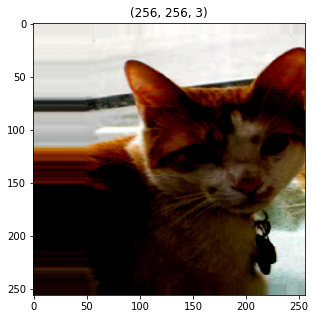

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


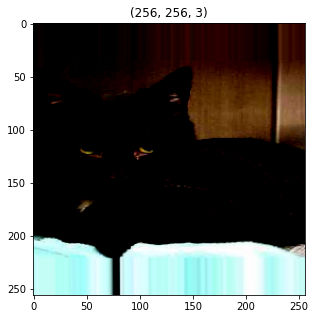

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


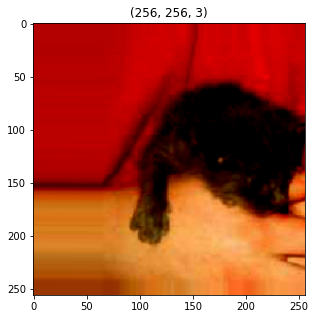

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


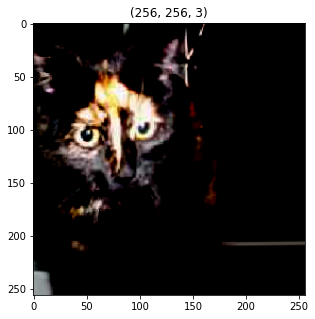

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


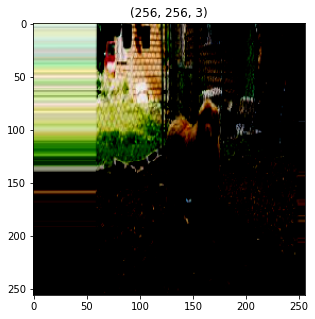

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


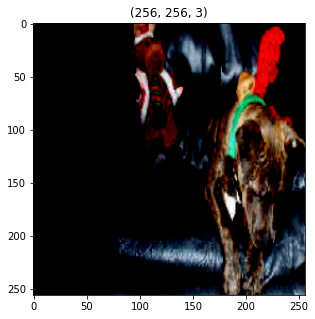

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


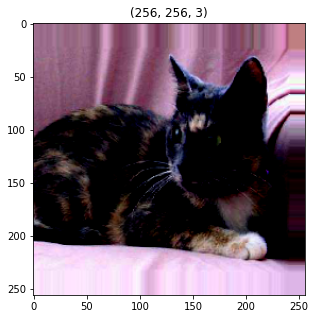

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


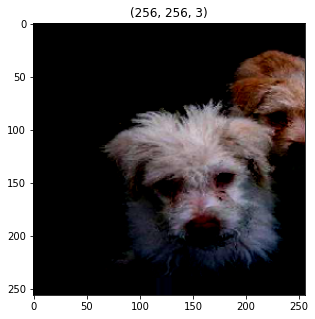

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


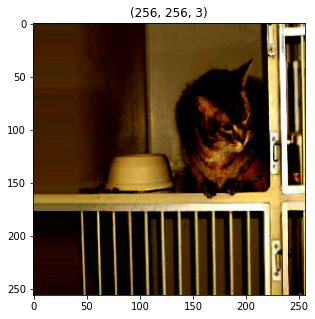

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


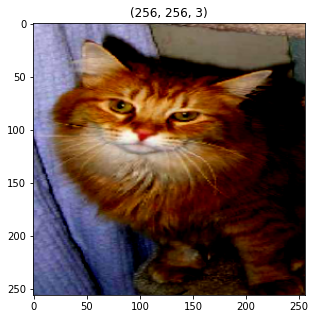

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


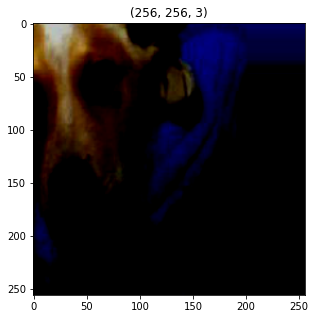

In [43]:
plotImages(t_img , label)

Model Check Point

In [44]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

mc= ModelCheckpoint(filepath= "./best_model.h5",
                    monitor="accuracy",
                    verbose=1,
                    save_best_only= True)

es= EarlyStopping(monitor= "accuracy",
                  min_delta=0.01,
                  patience= 5,
                  verbose= 1)

cb= [mc,es]

In [ ]:
his = model.fit_generator(train_data,
                          steps_per_epoch=10,
                          epochs=30,
                          callbacks= cb)

In [48]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [49]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy'])

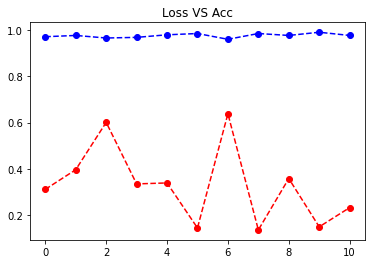

In [54]:
plt.plot(h['loss'],'go--', c="red" , )
plt.plot(h['accuracy'],'go--', c="blue" , )

plt.title("Loss VS Acc")
plt.show()

Validate the Model


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image is of cat


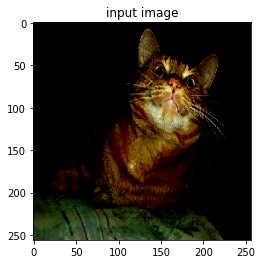

In [61]:
path = "/content/test1/10002.jpg"
img = load_img(path, target_size=(256,256) )

i=img_to_array(img)

i= preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred== 0:
  print("The image is of cat")
else:
  print("The image is of Dog")


plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = False
plt.show() 